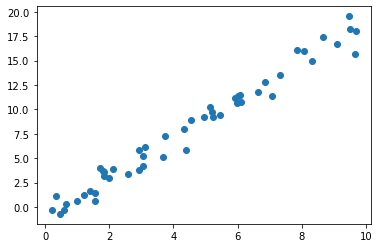

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42) # seeding # 컴퓨터의 난수는 의사난수 ( 이미 정해져있음, 시작점 )
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [2]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

## 선형회귀 : 절편(intercept)과 기울기(slope)
- regularzation 규제 : 과적합 -> 일반화 : ( 이미 에러가 있다고 가정하고 최적점으로 가는 것을 막는 것 )
- lasso : L1, 차의 절대값
- ridge : L2, 차의 제곱값
- elasticNet : L1 + L2

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # 인스턴스
model

LinearRegression()

In [4]:
X = x[:, np.newaxis] # 행을 열로 변경
X.shape

(50, 1)

In [5]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [6]:
model.fit(X, y) # fit : 학습 / predict : 예측

LinearRegression()

In [7]:
model.coef_

array([1.9776566])

In [8]:
model.intercept_

-0.903310725531111

In [9]:
xfit = np.linspace(-1, 11)

In [10]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

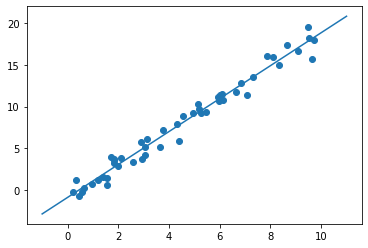

In [11]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [12]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) # 층화 샘플링

ridge = Ridge(alpha=0.01, max_iter=1000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.78
테스트 세트 점수 : 0.74


In [13]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))
accuracy_score(y_true, y_pred, normalize=False)

0.5


2

In [14]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = svm.SVC(gamma='scale', random_state=0)
cross_val_score(clf, X, y, scoring='recall_macro', cv=5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [15]:
from sklearn.metrics import confusion_matrix # 혼돈행렬
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [16]:
import numpy as np
import sklearn.metrics as metrics

y = np.array([1, 1, 1, 1, 0, 0]) # 실제
p = np.array([1, 1, 0, 0, 0, 0]) # 예측

accuracy = np.mean(np.equal(y,p)) # T : 4 / F : 2
right = np.sum(y * p == 1) # 2개 ( TP를 구하고 있음 )
precision = right / np.sum(p)
recall = right / np.sum(y)
f1 = 2 * precision * recall / (precision+recall)

print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)
print('f1 :', f1)

print()

print('accuracy :', metrics.accuracy_score(y,p) )
print('precision :', metrics.precision_score(y,p) )
print('recall :', metrics.recall_score(y,p) )
print('f1 :', metrics.f1_score(y,p) )

print(metrics.classification_report(y,p))
print(metrics.confusion_matrix(y,p))

accuracy : 0.6666666666666666
precision : 1.0
recall : 0.5
f1 : 0.6666666666666666

accuracy : 0.6666666666666666
precision : 1.0
recall : 0.5
f1 : 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


## 정규화 - 사이즈를 줄이려고
- 종속변수에 미치는 독립변수의 영향력을 통일하게 하기 위해서
- 건강 : 키(170) + 몸무게(80) : scale을 1로

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


<ipython-input-17-b7b9df3da635>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print((np.arange(10, dtype=np.float) - 3))
<ipython-input-17-b7b9df3da635>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = (np.arange(10, dtype=np.float) - 3).reshape(-1, 1)


<AxesSubplot:>

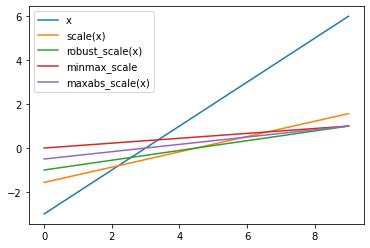

In [17]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
print((np.arange(10, dtype=np.float) - 3))
x = (np.arange(10, dtype=np.float) - 3).reshape(-1, 1)
# print(x)
# h : horizantal : 수평으로 변수를 만들어라
# v : vertical : 수직으로 데이터 포인트를 만들어라
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns=['x', 'scale(x)', 'robust_scale(x)',
                          'minmax_scale', 'maxabs_scale(x)'])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 평균 : [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std : [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 mean : [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리후 std : [1. 1. 1. 1.]


C:\Users\1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


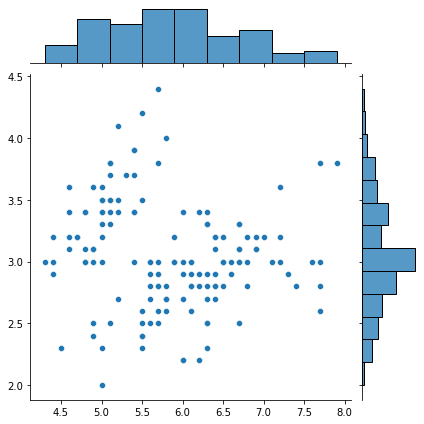

C:\Users\1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


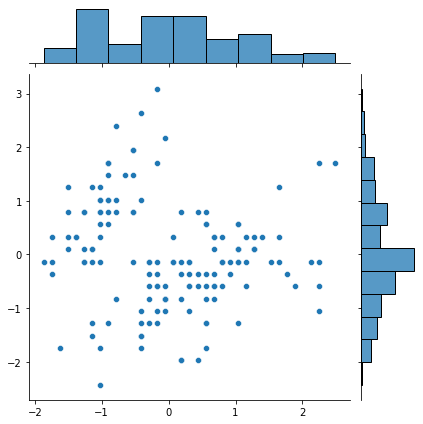

In [18]:
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
data1 = iris.data
data2 = scale(iris.data)
print('전처리전 평균 :', np.mean(data1, axis=0))
print('전처리전 std :', np.std(data1, axis=0))
print('전처리후 mean :', np.mean(data2, axis=0))
print('전처리후 std :', np.std(data2, axis=0))

sns.jointplot(data1[:,0], data1[:,1])
plt.show()

sns.jointplot(data2[:,0], data2[:,1])
plt.show()

## scikits의 특징
- 인터페이스 통일
- features_selection
- features_extraction
- decomposition
    - PCA, MDS, NMF, LLE( 변형이 없음 )
- 모델
    - 정보 기반학습 : 정보이득이 있어야 나눈다. (불순도)
    - 확률 기반학습 : naive bayes
    - 유사도 기반학습 : 거리와 내적을 이용해서
            - clustering : kmeans, dbscan, hierachical clustering
            - knn
            - recommendation 추천
    - 오차 기반학습
        - ANN -> DNN(CNN, RNN, GAN, AE)

In [19]:
from sklearn import preprocessing
X = [[1, -1, 2],
     [2,  0, 0],
     [0,  1, 1]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678]])

In [20]:
# 평균 / 표준편차
normalizer = preprocessing.Normalizer().fit(X)
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678]])

In [21]:
normalizer.fit_transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678]])

In [22]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [23]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [24]:
# 거리값으로 거리를 구한 다음 가장 근접한 2개의 데이터를 이용해서 평균갑승로 결측치 처리
from sklearn.impute import KNNImputer # knn k - nearest neighbor
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [25]:
import numpy as np
import pandas as pd
dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10]
outliers=[] 

- 표준차기반 이상치 제거 (Z점수 기반)
- 평균, 표준편차
- 표준정규분포에서 확률을 확인하고자 할 때

In [26]:
def detect_outlier(data_1):
    threshold = 3
    mean_1 = np.mean(data_1)
    std_1 = np.std(data_1)
    for y in data_1:
        z_score = (y - mean_1) / std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_datapoints = detect_outlier(dataset)
print(outlier_datapoints)

[100]


In [27]:
# from sklearn.datasets import load_boston
dataset = sorted(dataset)
print(dataset)
dataset = np.array(dataset)
q1, q3 = np.percentile(dataset, [25,75]) # 100분위수를 지정
lqr = q3 - q1 # 3사분위수 - 1사분위수 = inter quentile range
lower_bound = q1 - (1.5 * lqr) # 하향값
upper_bound = q3 + (1.5 * lqr) # 상향값
print(lower_bound)
print(upper_bound)
print(dataset < lower_bound)
print(dataset > upper_bound)
a = dataset < upper_bound
type(a)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 100]
6.5
18.5
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True]


numpy.ndarray

In [28]:
dataset[dataset > upper_bound]

array([100])

In [29]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[0], [1], [2]])
X
ohe.fit(X)
ohe.categories_

[array([0, 1, 2])]

In [30]:
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [31]:
ohe = OneHotEncoder()
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2], [1, 1, 3]])
ohe.fit(X)
ohe.categories_
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [32]:
ohe.categories_

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6])
le.classes_

array([1, 2, 6])

In [34]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [35]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

다음 데이터를 라벨인코딩 하시오 ["서울"],["서울"],["대전"],["부산"]

In [36]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
le2.fit(["서울", "서울", "대전", "부산"])
le2.classes_

array(['대전', '부산', '서울'], dtype='<U2')

["서울"],["서울"],["부산"] 데이터에 대하여 라벨링 해 보고, 다시 데이터로 변환하시오

In [37]:
le2.transform(["서울", "서울", "대전", "부산"])

array([2, 2, 0, 1], dtype=int64)

In [38]:
le2.inverse_transform([2, 2, 0, 1])

array(['서울', '서울', '대전', '부산'], dtype='<U2')

In [39]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [40]:
v.feature_names_ # 3개의 종류

['bar', 'baz', 'foo']

In [41]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

## 최적화
- 오버피팅(과적합)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3) # 3차방정식으로
print(z) # 계수
p = np.poly1d(z) # 계수들을 이용해서 방정식을 구성
print(p(0.5))
print(p(3.5))
print(p(10))

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]
0.6143849206349234
-0.34732142857142534
22.579365079364877


C:\Users\1\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


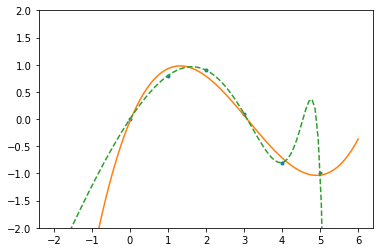

In [43]:
import matplotlib.pyplot as plt

p30 = np.poly1d(np.polyfit(x, y, 30))
p30(4)
xp = np.linspace(-2, 6, 100)

_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2, 2)
plt.show()

In [44]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

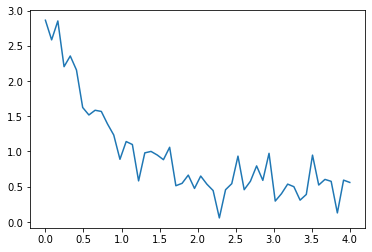

In [45]:
# scipy 최적화
from scipy.optimize import curve_fit

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size = xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata)

In [46]:
# 계수와 공분산
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.55423706, 1.35190947, 0.47450618])

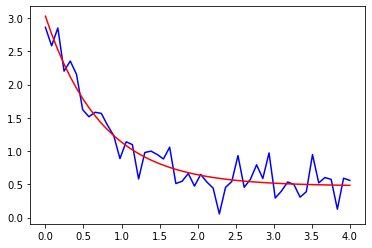

In [47]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-')

brute force ( 무차별 대입공격 )

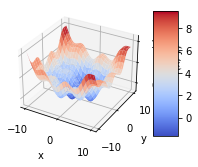

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
            + np.sin(y) + 0.05 * y ** 2)
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))
fig = plt.figure(figsize=(3, 6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
                       linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [49]:
import scipy.optimize as spo

def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
print(opt1)

[-1.4 -1.4]


In [50]:
output = False
# 할강단계법 - Nedler-Mead (알고리즘)
spo.fmin(fo, opt1, maxiter=250)

Optimization terminated successfully.
         Current function value: -1.775726
         Iterations: 22
         Function evaluations: 44


array([-1.42755002, -1.42749423])

## model-selection
- train_test_split
- GridSearchCV
- cross_val_score ( cross_validation )

## features-selection
- scikits : model - estimator
- RFE : recursive feature elimination 재귀적으로 변수를 제거하는 모델
- SVR
- RFE가 SVR을 Wrapper(감싸게) 하고있다.

In [51]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR # support vector machine regression
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear") # 선형
# 변수중요도에 따라서
selector = RFE(estimator, 5, step=1) # 변수 5개 제거
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)
print(selector.n_features_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]
5


C:\Users\1\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [52]:
selector.estimator_

SVR(kernel='linear')

### 문제
- 예측값과 실제값의 차이를 출력하시오 ( 테스트 데이터는 X를 그대로 사용하시오 )
- 출력된 차이의 MSE( mean square error )를 구하시오

In [53]:
# 예측값과 실제값의 차이
selector.predict(X) - y

array([-1.69902845, -2.79542068,  1.94390124,  1.07558198,  2.6534535 ,
       -2.62179791,  5.51989507, -5.58370939, -2.78286736, -3.0592759 ,
       -0.30609224, -1.19360287, -4.99205339, -3.10605401, -2.17419405,
        0.1056724 , -2.42551818,  3.84075279,  4.20689025, -0.31242916,
        1.24453339,  1.71599165, -3.67325733,  5.36041805,  4.7485667 ,
       -2.19288008, -2.16758485,  2.89354974,  1.8148168 ,  3.65635389,
        0.95460893, -0.08250305,  0.10017767, -2.5617331 ,  4.75055783,
        5.19629532,  2.5790045 , -0.57598316, -4.93496426,  2.53109964,
       -6.37444442,  1.61369407,  8.98444876, -0.10035544, -1.86204848,
       -0.77977276,  1.87672799, -2.67462797,  1.99958628, -0.09982201])

In [54]:
# 출력된 차이의 MSE(mean square error)
mse = sum( (selector.predict(X) - y) ** 2) / 50
mse

10.577977002630696

- 카이제곱 분석
- (관측값 - 기대값) **2 <br>
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ <br>
      기대값

In [55]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y = True)
X.shape

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

## 변수를 선택하는 방법
- tree 분석 -> variables-importance 출력
- 상관분석을 해서 중요변수를 선택
- PCA : 주성분을 이용해서 변수를 선택

In [57]:
from sklearn.datasets import load_boston # data, target


In [58]:
# 데이터 프레임에 입력하시오 그리고 head로 그 값을 확인하시오


In [59]:
# 변수간에 상관계수를 구하고 이를 시각화하시오 (heatmap을 이용)


In [60]:
# 상관계수가 0.5보다 큰 변수만 선택하시오


In [61]:
# 선형회귀를 이용해서 분석을 할 때 RFE를 이용해서 변수를 7개로 줄이시오
# 이 때 변수 ranking을 출력하시오